In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import math
import quandl

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [35]:
ANO = 2020

In [36]:
dados_acoes = pd.read_csv("dados_acoes.csv").set_index("Date")
dados_acoes = dados_acoes[f"{ANO}-01-01":"2021-07-13"].fillna(method="bfill")
dados_acoes.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,LAME4,LREN3,MGLU3,MULT3,PETR4,PRIO3,UGPA3,USIM5,VALE3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,18.616690,14.171139,49.813526,27.675463,32.296608,33.248966,114.239998,18.219999,8.346132,10.879397,...,26.558912,56.116272,12.029736,32.920799,29.698208,7.156,24.704342,9.552723,48.935547,11.73
2020-01-03,18.354891,13.762751,49.730198,27.243608,32.311470,32.882446,113.800003,18.629999,8.239006,10.761824,...,26.608463,55.725891,11.922435,32.920799,29.456367,7.570,24.414837,9.454242,48.575260,11.48
2020-01-06,18.442158,13.630808,49.072807,27.087347,31.734316,33.423504,112.589996,18.500000,8.034492,10.910750,...,26.301252,55.677101,11.932189,32.861927,29.804619,7.718,23.884081,9.276975,48.287033,11.48
2020-01-07,18.480942,14.070614,48.702442,26.626389,31.183002,33.440960,112.239998,18.799999,7.800761,11.310496,...,25.776020,55.647820,11.898048,32.950237,29.688534,7.728,24.414837,9.365607,48.638309,11.65
2020-01-08,18.393677,14.032915,48.258015,26.220121,30.700621,33.423504,111.949997,18.250000,7.625463,11.624024,...,25.587729,56.008915,12.263844,33.077797,29.504732,7.570,24.221834,9.247430,48.647316,11.60


In [37]:
dados_cripto = pd.read_csv("dados_criptos.csv").set_index("Date")
dados_cripto = dados_cripto[f"{ANO}-01-01":"2021-07-13"].fillna(method="bfill")
dados_cripto.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DCR-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.033458,204.397537,13.689083,7200.174316,16.922859,0.002033,2.597236,4.502792,130.802002,3.844520,...,8.848996,8.759675,0.086963,0.013250,0.005367,1.048181,0.045451,45.753544,0.192667,1.370210
2020-01-02,0.032751,195.698563,13.027011,6985.470215,16.370251,0.002009,2.462377,4.255888,127.410179,4.459174,...,8.493940,8.638507,0.085025,0.012870,0.005097,0.953234,0.044112,45.749470,0.188043,1.241036
2020-01-03,0.034180,222.412979,13.660452,7344.884277,17.280699,0.002145,2.637661,4.576237,134.171707,3.420579,...,8.887547,8.972719,0.087472,0.013435,0.005336,0.957041,0.045234,51.092037,0.193521,1.282225
2020-01-04,0.034595,226.018692,13.891512,7410.656738,17.490995,0.002241,2.667841,4.726842,135.069366,3.270750,...,9.152635,9.237611,0.093745,0.013521,0.005673,0.951026,0.046272,50.536694,0.194355,1.261942
2020-01-05,0.034721,224.096527,14.111019,7411.317383,17.781300,0.002419,2.701631,4.907899,136.276779,3.496339,...,9.068814,9.457958,0.094289,0.013623,0.005504,0.891762,0.045359,54.096893,0.195537,1.263569


In [38]:
dados = dados_acoes.join(dados_cripto).dropna()
dados.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,18.616690,14.171139,49.813526,27.675463,32.296608,33.248966,114.239998,18.219999,8.346132,10.879397,...,8.493940,8.638507,0.085025,0.012870,0.005097,0.953234,0.044112,45.749470,0.188043,1.241036
2020-01-03,18.354891,13.762751,49.730198,27.243608,32.311470,32.882446,113.800003,18.629999,8.239006,10.761824,...,8.887547,8.972719,0.087472,0.013435,0.005336,0.957041,0.045234,51.092037,0.193521,1.282225
2020-01-06,18.442158,13.630808,49.072807,27.087347,31.734316,33.423504,112.589996,18.500000,8.034492,10.910750,...,9.773406,9.770777,0.099231,0.014548,0.005735,0.895870,0.049124,58.970917,0.221510,1.305486
2020-01-07,18.480942,14.070614,48.702442,26.626389,31.183002,33.440960,112.239998,18.799999,7.800761,11.310496,...,9.821853,9.713964,0.095893,0.014373,0.005590,0.888910,0.049838,58.818295,0.213917,1.298295
2020-01-08,18.393677,14.032915,48.258015,26.220121,30.700621,33.423504,111.949997,18.250000,7.625463,11.624024,...,9.525661,9.629851,0.097745,0.014069,0.005521,0.855543,0.048717,59.464172,0.209026,1.333609


In [39]:
retornos_acoes = dados_acoes.pct_change().dropna()
retornos_cripto = dados_cripto.pct_change().dropna()

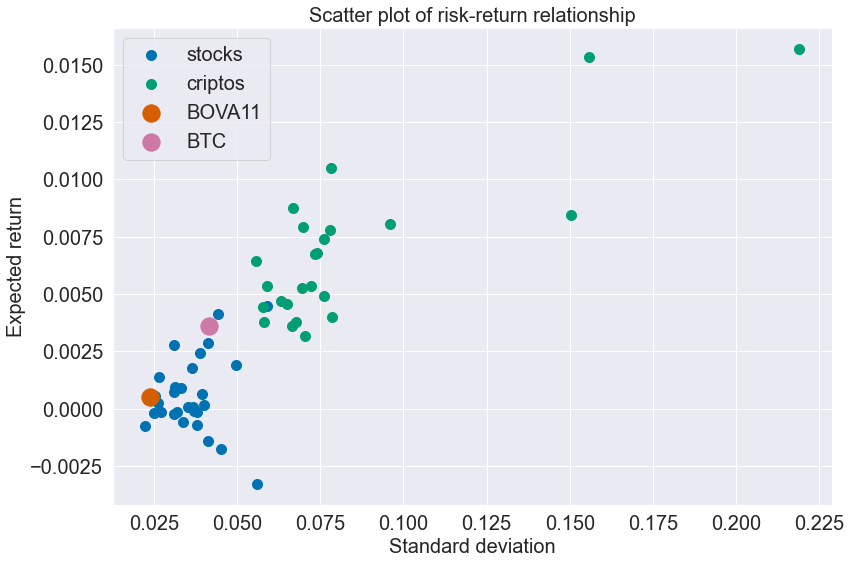

In [40]:
plt.scatter(retornos_acoes.std(), retornos_acoes.mean(), s=100)
plt.scatter(retornos_cripto.std(), retornos_cripto.mean(), s=100)
plt.scatter(retornos_acoes.std()['BOVA11'], retornos_acoes.mean()['BOVA11'], s=300)
plt.scatter(retornos_cripto.std()['BTC-USD'], retornos_cripto.mean()['BTC-USD'],s=300)
plt.ylabel("Expected return")
plt.xlabel("Standard deviation")
plt.title("Scatter plot of risk-return relationship")
plt.legend(["stocks", "criptos", "BOVA11", "BTC"])
plt.tight_layout()
plt.savefig(f"graficos/scatter_plot_{ANO}.png")

In [41]:
N = 252 # 252 trading days in a year
rf = 0.025 # 3.75% risk free rate

In [42]:
def sharpe_ratio(data, N, rf):
    returns = data.pct_change()
    mean = returns.mean() - (math.pow(1+rf, 1/N)-1)
    sigma = returns.std()
    return mean / sigma

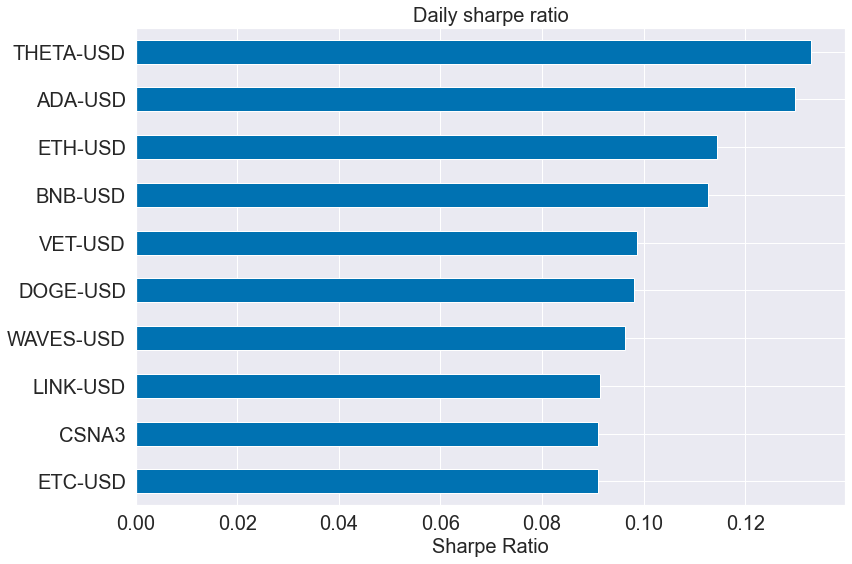

In [43]:
sharpes_acoes = dados_acoes.apply(sharpe_ratio, args = (N, rf, ), axis = 0)
sharpes_criptos = dados_cripto.apply(sharpe_ratio, args = (365, rf, ), axis = 0)
sharpes = pd.concat([sharpes_acoes, sharpes_criptos])
sharpes.sort_values()[-10:].plot.barh()
plt.xlabel('Sharpe Ratio')
plt.title("Daily sharpe ratio")
plt.tight_layout()
plt.savefig(f"graficos/sharpes_{ANO}.png")

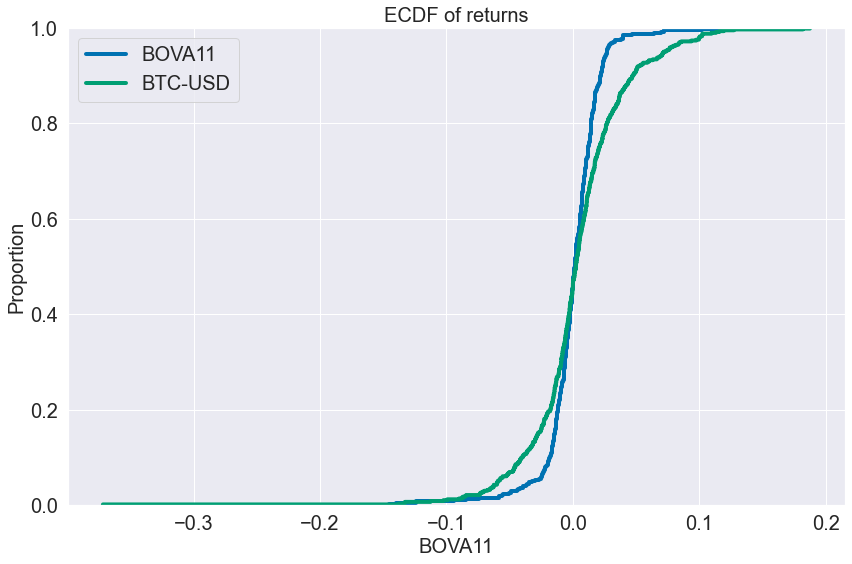

In [44]:
sns.ecdfplot(retornos_acoes['BOVA11'])
sns.ecdfplot(retornos_cripto['BTC-USD'])
plt.legend(labels=["BOVA11", "BTC-USD"])
plt.title("ECDF of returns")
plt.tight_layout()
plt.savefig(f"graficos/ecdf_{ANO}.png")